<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/naver_map_store_review_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 지도 영업점 리뷰 스크래핑

## Selenium 및 웹 드라이버 설치

In [3]:
!pip install Selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox') # 눈에 보이게 띄우지 않아도 되게끔
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 979 kB 5.0 MB/s 
     |████████████████████████████████| 359 kB 43.4 MB/s 
     |████████████████████████████████| 138 kB 30.7 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.

In [4]:
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
url = 'https://pcmap.place.naver.com/restaurant/35563923/review/visitor?reviewSort=recent'

wd = webdriver.Chrome('chromedriver', options=chrome_options)
wd.get(url)

writer_list = []
review_list = []
date_list = []


while True:
  try:
    wd.find_element_by_xpath('//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
    time.sleep(1)

  except NoSuchElementException:
    break


writers = wd.find_elements_by_class_name('_16RxQ')
writer_list += [writer.text for writer in writers]

reviews = wd.find_elements_by_class_name('WoYOw')
review_list += [review.text for review in reviews]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead


In [10]:
writer_list

['새미82',
 '40****',
 '찬호8018',
 '쁘띠동구리',
 '룰루76',
 '간장게장27',
 '육식모험가',
 'swagdepoulemaggle',
 'lcw',
 '보라9952',
 'jou****',
 '강대95',
 'hahihuheho2',
 'thuglife',
 'Pickers',
 'ssbk12',
 'nnneun',
 'hye****',
 '일똥이',
 '해밀288',
 'jou****',
 '강대95',
 'hahihuheho2',
 'thuglife',
 'Pickers',
 'ssbk12',
 'nnneun',
 'hye****',
 '일똥이',
 '해밀288',
 '정혜린47',
 'tkfkd9472',
 '까칠한언니',
 'tmd****',
 'nay****',
 'ke****',
 '김진영6272',
 '크림공주',
 '승6375',
 'Ace21',
 '두칠70',
 'olo80',
 '줆10',
 'wou****',
 'kjy****',
 'clev',
 'Jung6298',
 'Hyeon1850',
 'daysun',
 '비토끼']

In [93]:
review_df = pd.DataFrame({'review':review_list})


## 워드 클라우드

In [16]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 42.1 MB/s 
     |████████████████████████████████| 448 kB 43.6 MB/s 


In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Kkma #형태소 분석기 호출
from PIL import Image
from konlpy.utils import pprint
import numpy as np

In [94]:
review_df

,review
0,굿
1,분위기 좋아요
2,치킨 존맛
3,수제맥주 다양하고 맛있어요 바 내부 좌석 & 야외 좌석 있어요 요즘 날씨는 야외가 ...
4,다른 곳은 노래사운드가너무 커서 대화하기 불편한데 여기는 사운드도 적당해서 좋아요.
5,맛있어요 굳
6,수제 맥주치고 괜찮음 자리는 걍 조금 불편한데 얘기하긴 좋은 분위기 글고 직원분들 ...
7,여기가 이태원 요 거리 중에서는 제일 괜찮습니다! 밖에 테이블도 있고 담배냄새도 안...
8,매장은 작은 편이고 자리가 그렇게 편하진 않지만 맥주 다양하고 맛있어요
9,굿


In [96]:
' '.join(review_df['review'])

'굿 분위기 좋아요 치킨 존맛 수제맥주 다양하고 맛있어요 바 내부 좌석 & 야외 좌석 있어요 요즘 날씨는 야외가 상석인듯 합니다만 자리가 없어 실내에 자리잡고~ ㅎ 음악 볼륨이 대화하기 좋을정도고요 간단하게 마시기 좋고 편하게 분위기 내기 좋네요 다른 곳은 노래사운드가너무 커서 대화하기 불편한데 여기는 사운드도 적당해서 좋아요. 맛있어요 굳 수제 맥주치고 괜찮음 자리는 걍 조금 불편한데 얘기하긴 좋은 분위기 글고 직원분들 친절해요 여기가 이태원 요 거리 중에서는 제일 괜찮습니다! 밖에 테이블도 있고 담배냄새도 안 나고 노래 소리도 다른 매장들처럼 너무 안 크고 치킨도 반마리 있어서 배부를 때 시키기 딱 좋고 친절하십니다! 친구한테도 추천 완료 매장은 작은 편이고 자리가 그렇게 편하진 않지만 맥주 다양하고 맛있어요 굿 굿 간만에 이태원~~ 좋아요! :) 이태원가고싶다 직원분들 웃으면서 응대해주시거 요청사항 잘 들어주시구 음식도 술도 추천해주시고 좋아요 ㅎㅎ번창하세요~~🕊\U0001f90d 콥딥, 크리스피 반마리 최고의 조합! 맛나요 분위기도 좋고 맛있어요^^ 분위기 좋아요 ㅎㅎ 굿 간만에 이태원~~ 좋아요! :) 이태원가고싶다 직원분들 웃으면서 응대해주시거 요청사항 잘 들어주시구 음식도 술도 추천해주시고 좋아요 ㅎㅎ번창하세요~~🕊\U0001f90d 콥딥, 크리스피 반마리 최고의 조합! 맛나요 분위기도 좋고 맛있어요^^ 분위기 좋아요 ㅎㅎ 좋아요 굿굿 매너가 너무너무 없으신 사장님...... 다시는 안가요... 맛있었어욘!! 야외에 시원한 바람 맞으며 먹는 맥주는 진리죠~ 좀더 맥주가 시원했음 좋겠고 가방이나 옷 걸어두는 보관함이 좀더 나아졌음 좋겠네요. 맥주 너무 맛있어요 분위기랑 인테리어 좋습니다 내 최애 맥주집 ㅠ 가보세용 어제 알바분도 처음 일 하신데요 ㅋㅋㅋ 귀여워요 맥주가 맛잇는 집 맥주가 맛있어요 가볍게 한잔하기 좋아요 맥주 넘넘 맛있고 치킨이 약간 매콤하니 kfc맛 남 ㅎㅎㅎ굿 괜찮아요! 가격대비 좋아용 사람 개많아요 굿 맛잇어요 굿굳 그럭저럭 수제

In [97]:
plt.rc('font', family='NanumGothicOTF') # For MacOS, Server컴 

print(plt.rcParams['font.family'])


['NanumGothicOTF']


In [99]:
font_path = '/content/NanumGothic.ttf'  # 각자 경로에 맞게


NameError: ignored

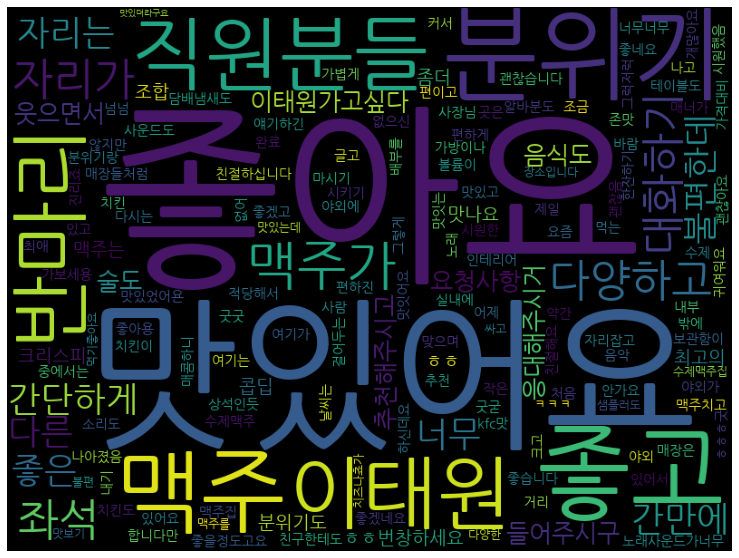

In [101]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color='black',
                      font_path = font_path,
                      width=800,
                      height=600).generate(' '.join(review_df['review']))

plt.figure(figsize = (15, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()